# Dependecies

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 40)

In [49]:
!pip install inflection

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Soal 1

Lakukan EDA pada dataset untuk mendapatkan pemahaman
umum mengenai data dan memandu proses feature
engineering

### Load the dataset

In [50]:
df = pd.read_csv("./flight.csv")
df.columns = df.columns.str.lower()
df.sample(5)

,member_no,ffp_date,first_flight_date,gender,ffp_tier,work_city,work_province,work_country,age,load_time,flight_count,bp_sum,sum_yr_1,sum_yr_2,seg_km_sum,last_flight_date,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight
7683,24453,4/16/2012,4/16/2012,Male,4,yichang,hubei,CN,54.0,3/31/2014,27,24208,11332.0,13265.0,30338,3/28/2014,4,27.384615,130,1,0.867110,24208,1
57424,16537,3/23/2013,8/7/2013,Male,4,beijing,beijing,CN,38.0,3/31/2014,3,1453,0.0,1834.0,2097,11/11/2013,142,48.000000,95,0,0.789041,1453,0
19149,24832,12/19/2012,12/19/2012,Male,4,shanghai,shanghai,CN,46.0,3/31/2014,8,11838,1611.0,8442.0,14428,8/30/2013,215,36.285714,219,0,0.885135,11838,0
62632,5191,4/7/2011,4/7/2011,Male,5,shantou,guangdong,CN,NaN,3/31/2014,2,1000,0.0,1109.0,760,3/25/2014,7,1.000000,1,0,0.840000,1000,0
40194,28005,11/23/2006,1/27/2007,Male,4,beijing,beijing,CN,50.0,3/31/2014,5,3887,1733.0,2661.0,6395,11/19/2013,134,107.750000,340,0,0.721077,3887,0


### Data type

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   member_no          62988 non-null  int64  
 1   ffp_date           62988 non-null  object 
 2   first_flight_date  62988 non-null  object 
 3   gender             62985 non-null  object 
 4   ffp_tier           62988 non-null  int64  
 5   work_city          60719 non-null  object 
 6   work_province      59740 non-null  object 
 7   work_country       62962 non-null  object 
 8   age                62568 non-null  float64
 9   load_time          62988 non-null  object 
 10  flight_count       62988 non-null  int64  
 11  bp_sum             62988 non-null  int64  
 12  sum_yr_1           62437 non-null  float64
 13  sum_yr_2           62850 non-null  float64
 14  seg_km_sum         62988 non-null  int64  
 15  last_flight_date   62988 non-null  object 
 16  last_to_end        629

**Pengamatan**
* Kolom yang merupakan date masih bertipe object yang mana seharusnya diubah ke tipe data datetime
* Beberapa kolom terdapat missing values

### Missing values

In [52]:
df.isnull().sum()

member_no               0
ffp_date                0
first_flight_date       0
gender                  3
ffp_tier                0
work_city            2269
work_province        3248
work_country           26
age                   420
load_time               0
flight_count            0
bp_sum                  0
sum_yr_1              551
sum_yr_2              138
seg_km_sum              0
last_flight_date        0
last_to_end             0
avg_interval            0
max_interval            0
exchange_count          0
avg_discount            0
points_sum              0
point_notflight         0
dtype: int64

### Duplicated data

In [53]:
df.duplicated().sum()

0

In [54]:
numerical = [
    'member_no', 'ffp_tier', 'age', 
    'flight_count', 'bp_sum', 'sum_yr_1',
    'sum_yr_2', 'seg_km_sum', 'last_to_end', 
    'avg_interval', 'max_interval',
    'exchange_count', 'avg_discount', 'points_sum', 
    'point_notflight']

## EDA with Pandas Profiling

In [20]:
#from pandas_profiling import ProfileReport
#profile = ProfileReport(df, title="Airline Customer Value Analysis Report")
#profile.to_file("airline_customer_value.html")

In [21]:
#profile

Berdasarkan pandas profiling untuk dataset ini, berikut ini kesimpulan yang diperoleh.

**Descriptive Statistics**

In [55]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
member_no,62988.0,31494.500000,18183.213715,1.0,15747.750000,31494.500000,47241.250000,62988.0
ffp_tier,62988.0,4.102162,0.373856,4.0,4.000000,4.000000,4.000000,6.0
age,62568.0,42.476346,9.885915,6.0,35.000000,41.000000,48.000000,110.0
flight_count,62988.0,11.839414,14.049471,2.0,3.000000,7.000000,15.000000,213.0
bp_sum,62988.0,10925.081254,16339.486151,0.0,2518.000000,5700.000000,12831.000000,505308.0
sum_yr_1,62437.0,5355.376064,8109.450147,0.0,1003.000000,2800.000000,6574.000000,239560.0
sum_yr_2,62850.0,5604.026014,8703.364247,0.0,780.000000,2773.000000,6845.750000,234188.0
seg_km_sum,62988.0,17123.878691,20960.844623,368.0,4747.000000,9994.000000,21271.250000,580717.0
last_to_end,62988.0,176.120102,183.822223,1.0,29.000000,108.000000,268.000000,731.0
avg_interval,62988.0,67.749788,77.517866,0.0,23.370370,44.666667,82.000000,728.0


* Dataset ini memiliki 62988 observasi, 14 kolom numerik dan 9 kolom kategorikal. Namun, di antara kolom kategorikal terdapat kolom tanggal.
* `load_time` hanya memiliki satu unique value sedangkan `member_no` memiliki jumlah unique value yang sama dengan jumlah rows di dataset.
* `ffp_tier` memiliki 3 unique values sehingga lebih tepat men-treat kolom tersebut sebagai kolom kategorikal.
* Kolom-kolom tanggal seperti `ffp_date`, `first_flight_date`, `last_flight_date`, dan `load_time` masih dalam tipe object yang mana seharusnya diubah menjadi tipe datetime.
* Total missing values di dataset sebanyak 6655 rows (0.5%).
* Kolom-kolom yang memiliki missing values
    * Numerik: `age`, `sum_yr_1`, `sum_yr_2`
    * Kategorikal: `gender`, `work_city`, `work_province`, `work_country`
    * Kolom numerik tersebut akan diimpute dengan median masing-masing sedangkan kolom kategorikal tersebut akan didrop.

In [56]:
df.describe(exclude=np.number).T

,count,unique,top,freq
ffp_date,62988,3068,1/13/2011,184
first_flight_date,62988,3406,2/16/2013,96
gender,62985,2,Male,48134
work_city,60719,3234,guangzhou,9386
work_province,59740,1165,guangdong,17509
work_country,62962,118,CN,57748
load_time,62988,1,3/31/2014,62988
last_flight_date,62988,731,3/31/2014,959


**Univariate Analysis**

In [58]:
from matplotlib import rcParams
import seaborn as sns
import inflection
import scipy.stats as stats

from sklearn.model_selection import train_test_split

rcParams['figure.figsize'] = (18, 12)

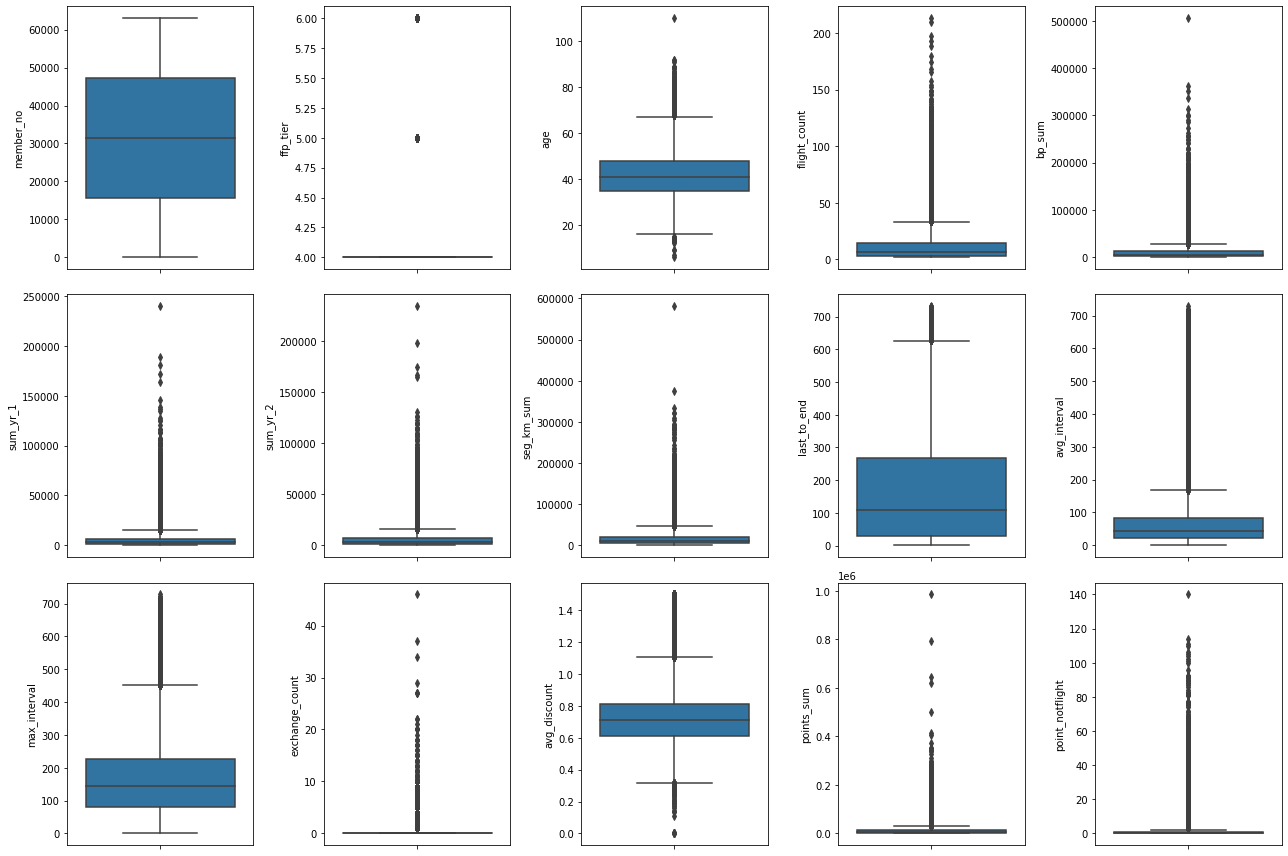

In [59]:
for i, col in enumerate(numerical):
    plt.subplot(3, 5, i+1)            
    sns.boxplot(
        y=df[col], 
        #color=COLORS[1], 
        orient='v'
    )
    #plt.xlabel(col, fontsize=14)
    #plt.grid(axis='x', alpha=0.5)
    #plt.ylim([-1, 1.1 * df[col].max()])
    plt.tight_layout()

plt.show() 

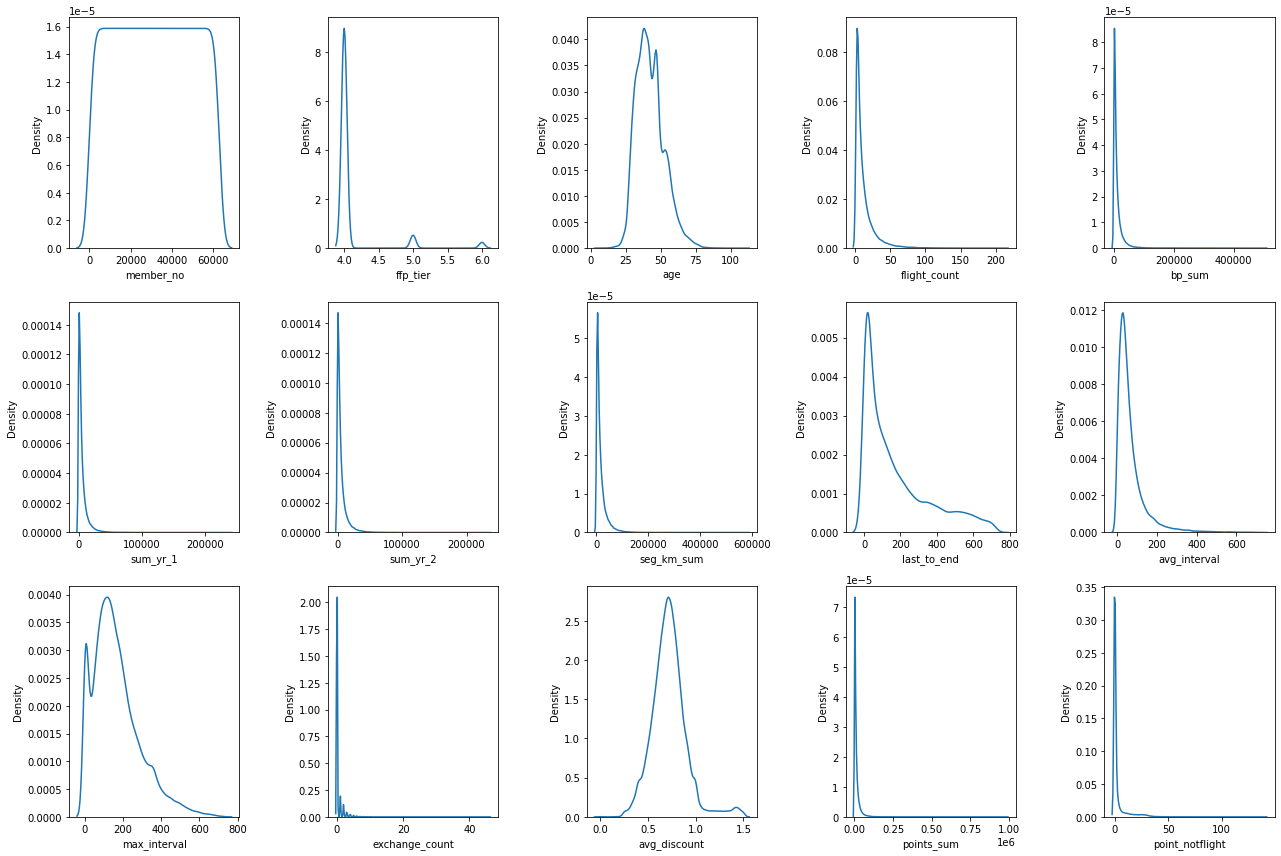

In [60]:
for i, col in enumerate(numerical):
    plt.subplot(3, 5, i+1)            
    sns.kdeplot(
        x=df[col], 
        #color=COLORS[1], 
    )
    #plt.xlabel(col, fontsize=14)
    #plt.grid(axis='x', alpha=0.5)
    #plt.ylim([-1, 1.1 * df[col].max()])
    plt.tight_layout()

plt.show() 

* Hampir seluruh kolom memiliki distribusi yang right-skewed dan beberapa ada yang near-normal.
* Selain `member_no`, seluruh kolom numerik memiliki outliers.

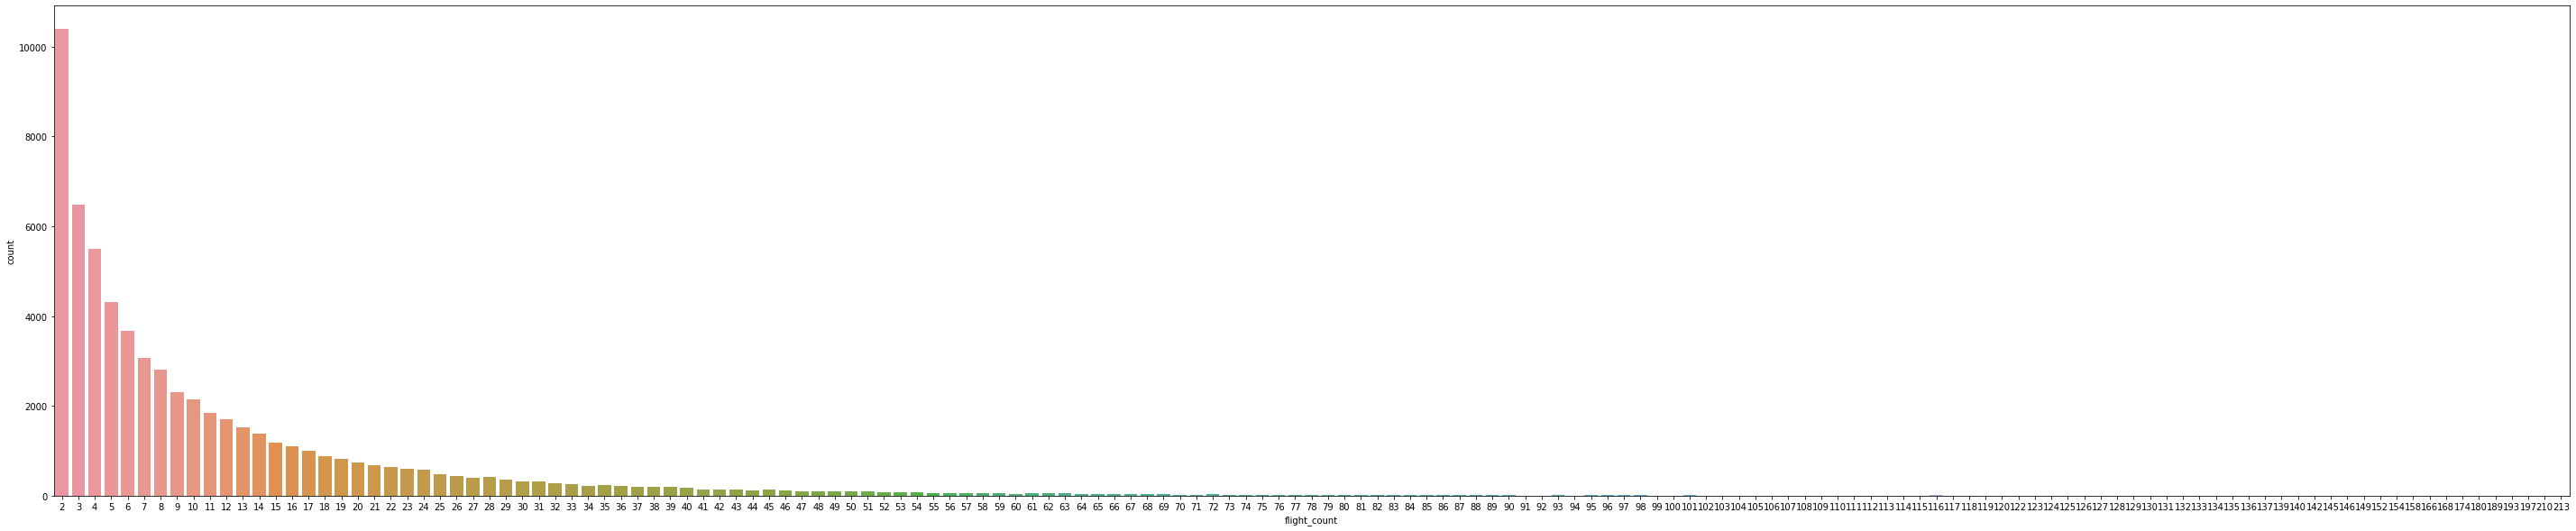

In [61]:
plt.figure(figsize=(50,10))
ax = sns.countplot(x="flight_count", data=df)

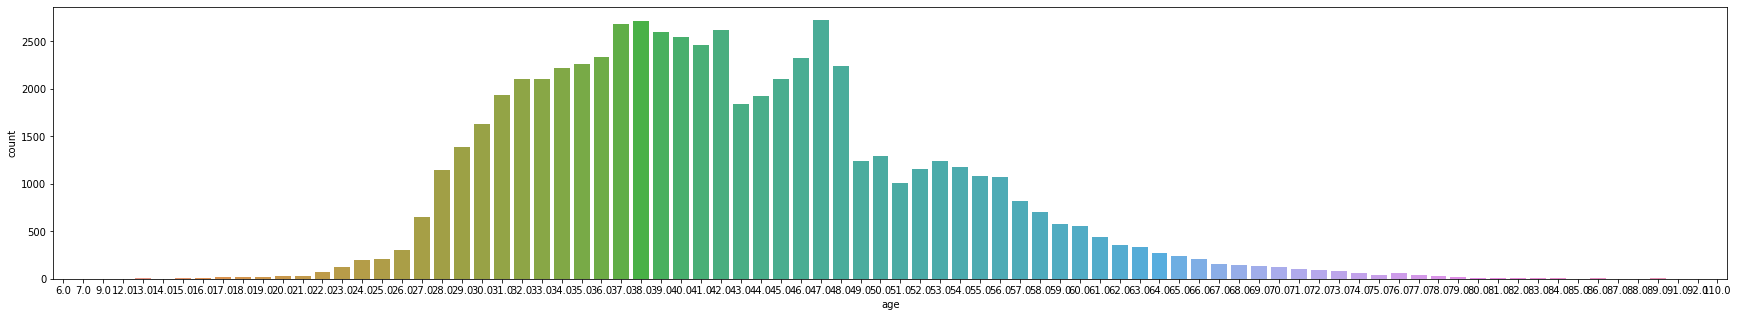

In [62]:
plt.figure(figsize=(30,5))
ax = sns.countplot(x="age", data=df)

Mayoritas pelanggan berada di rentang 27-55 tahun. Hal ini menunjukkan bahwa pelanggan banyak melakukan perjalanan bisnis karena rentang usia tersebut merupakan usia produktif bekerja.

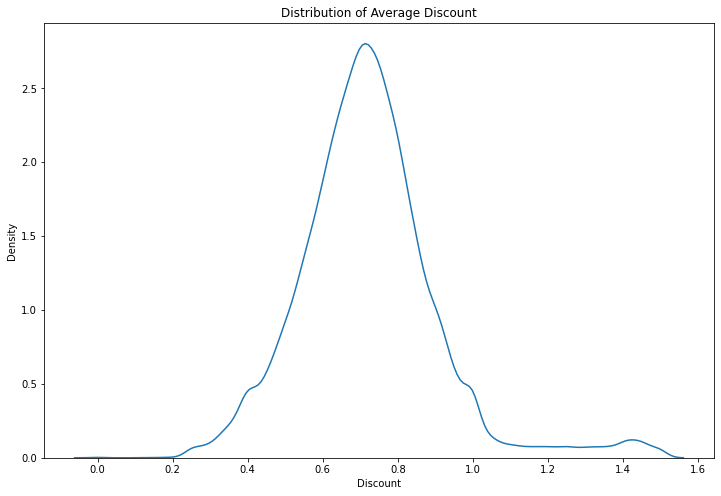

In [63]:
plt.figure(figsize=(12,8))
ax = sns.kdeplot(x='avg_discount', data=df)
ax.set_title("Distribution of Average Discount")
ax.set_ylabel("Density")
ax.set_xlabel("Discount")
plt.show()

Nilai average discount seharusnya berada kurang dari 1 (100%) sehingga data dengan nilai average discount di atas satu akan di-drop.

In [64]:
df[df['last_flight_date'] == '2014/2/29  0:00:00']

,member_no,ffp_date,first_flight_date,gender,ffp_tier,work_city,work_province,work_country,age,load_time,flight_count,bp_sum,sum_yr_1,sum_yr_2,seg_km_sum,last_flight_date,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight
248,56497,6/17/2007,6/17/2007,Female,6,guangzhou,guangdong,CN,46.0,3/31/2014,53,116307,30884.0,70845.0,85000,2014/2/29 0:00:00,32,13.250000,57,0,1.373478,132653,4
447,17306,8/26/2009,4/29/2010,Male,5,haerbin,heilongjiang,CN,70.0,3/31/2014,31,96739,26510.0,46323.0,69453,2014/2/29 0:00:00,32,22.766667,75,6,1.375395,101413,7
473,915,11/10/2006,1/26/2007,Male,5,.,beijing,CN,39.0,3/31/2014,49,84754,28693.0,30580.0,65717,2014/2/29 0:00:00,32,14.250000,65,1,1.425974,93153,8
832,20336,7/13/2005,8/6/2005,Male,5,guangzhou,guangdong,CN,40.0,3/31/2014,80,61418,32900.0,36417.0,114222,2014/2/29 0:00:00,32,8.696203,34,2,0.664970,91476,15
1051,62884,5/24/2006,4/21/2007,Male,5,wuhan,hubei,CN,50.0,3/31/2014,27,65918,23892.0,35680.0,49859,2014/2/29 0:00:00,32,19.115385,72,4,1.388584,69047,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61539,55995,1/11/2013,7/10/2013,Male,4,dalianshi,liaoning,CN,23.0,3/31/2014,3,0,0.0,955.0,3513,2014/2/29 0:00:00,32,117.000000,211,0,0.276667,0,0
61871,48742,7/26/2009,7/26/2009,Male,4,tianjin,tianjin,CN,37.0,3/31/2014,2,854,0.0,966.0,1298,2014/2/29 0:00:00,32,135.000000,135,0,0.690000,1094,1
61909,9190,4/11/2011,4/20/2011,Male,4,guangzhou,guangdong,CN,34.0,3/31/2014,2,838,0.0,853.0,2595,2014/2/29 0:00:00,32,1.000000,1,0,0.340000,3356,19
62721,38776,10/31/2007,3/13/2008,Male,4,foshan,guangdong,CN,42.0,3/31/2014,2,276,0.0,688.0,1199,2014/2/29 0:00:00,32,78.000000,78,0,0.489525,276,0


Terdapat 421 rows yang memiliki last flight date 29 Feb 2014 yang mana seharusnya 28 Feb 2014. Oleh karena itu, tanggal yang salah akan diganti.

**Multivariate Analysis**

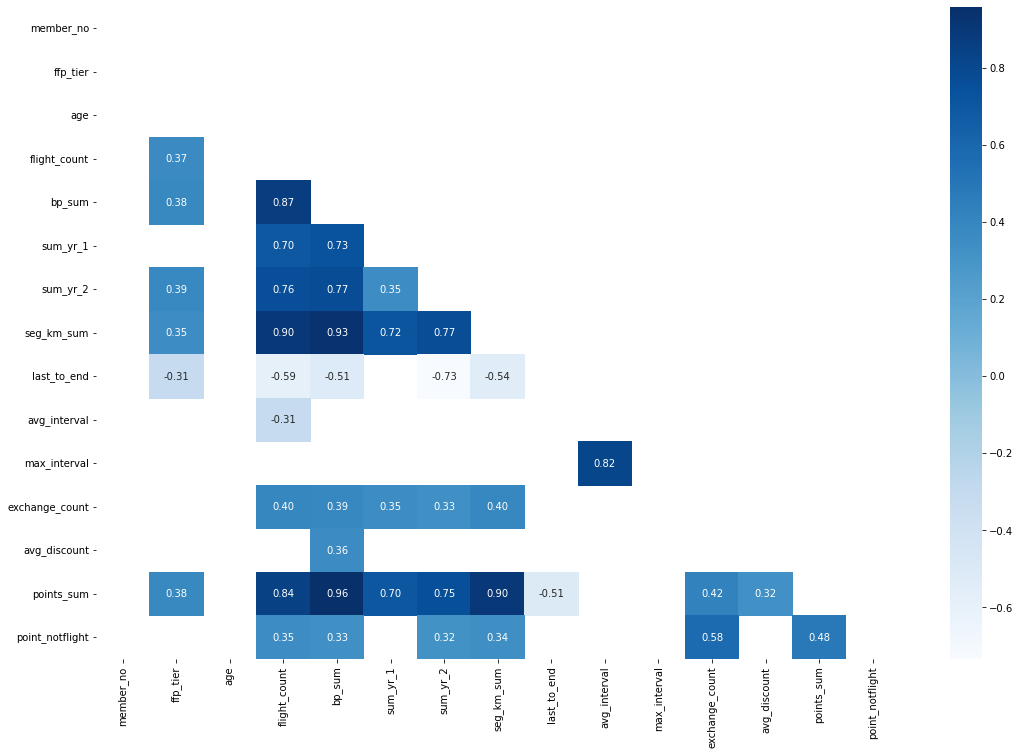

In [65]:
data = df[numerical].corr(method='spearman')
data_filter = data[(data >=0.3) | (data <= -0.3)]
sns.heatmap(
    data_filter, 
    mask=np.triu(np.ones_like(data)),
    cmap='Blues', annot=True, fmt='.2f'
)
plt.show()

* Karena mayoritas kolom numerik memiliki distribusi right-skewed dan terdapat outlier, maka spearman's correlation lebih tepat digunakan dibandingkan pearson's correlation.
* Banyak multicollinear features sehingga dimensionality reduction bisa diterapkan
* Feature-feature dibawah ini dapat didrop karena memiliki tidak memiliki korelasi yang tinggi antar feature.
    * `member_no`
    * `age`
    * `last_to_end`
    * `max_interval`
    * `avg_interval`
    * `avg_discount`

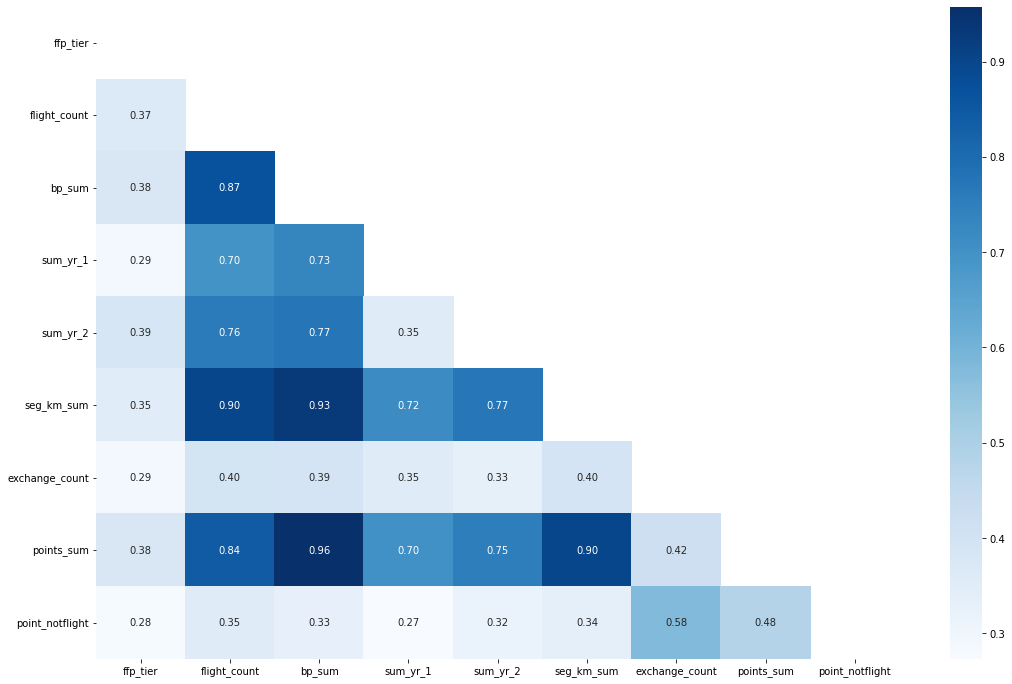

In [66]:
selected_numerical = [
    #'member_no', 
    'ffp_tier', #'age', 
    'flight_count', 'bp_sum', 'sum_yr_1',
    'sum_yr_2', 'seg_km_sum', #'last_to_end', 
    #'avg_interval', 'max_interval',
    'exchange_count', #'avg_discount', 
    'points_sum', 
    'point_notflight']

data = df[selected_numerical].corr(method='spearman')
sns.heatmap(
    data, 
    mask=np.triu(np.ones_like(data)),
    cmap='Blues', annot=True, fmt='.2f'
)
plt.show()

### Data Preparation

In [67]:
def data_preparation(df):
    df = df.copy()
    
    # remove unimportant features
    drop_cols = ['gender', 'work_city', 'work_province', 'work_country']
    df = df.drop(drop_cols, axis=1)
    
    # remove the data with avg discount more than 1
    df = df[df['avg_discount'] <= 1]
    
    # replace 2014/2/29 with 2014/2/28 for last_flight_date
    df['last_flight_date'] = df['last_flight_date'].replace(
        '2014/2/29  0:00:00',
        '2014/2/28  0:00:00'
    )
    
    # parsing to datetime (without load_time)
    date_features = ['load_time', 'ffp_date', 'first_flight_date', 'last_flight_date']
    for date_feat in date_features:
        df[date_feat] = pd.to_datetime(df[date_feat])
        
    # fill NAN with its median (only for numerical)
    numerical_with_na = ['age', 'sum_yr_1', 'sum_yr_2']
    for num in numerical_with_na:
        df[num] = df[num].fillna(df[num].median())
    
    return df

df = data_preparation(df)
df.sample(3)

,member_no,ffp_date,first_flight_date,ffp_tier,age,load_time,flight_count,bp_sum,sum_yr_1,sum_yr_2,seg_km_sum,last_flight_date,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight
35400,2710,2008-10-07,2008-10-07,4,43.0,2014-03-31,12,4705,698.0,832.0,9385,2014-03-21,11,34.454545,219,0,0.618487,4705,0
6013,56900,2007-12-12,2009-08-13,4,46.0,2014-03-31,33,24592,17077.0,10143.0,42564,2013-11-16,137,18.156250,129,0,0.718315,24592,0
46088,37331,2009-02-27,2013-09-12,4,34.0,2014-03-31,2,3911,0.0,3058.0,4065,2013-09-14,200,2.000000,2,0,0.842583,4405,1


# Soal 2

Pilih fitur-fitur yang menurut teman-teman masuk akal secara
bisnis untuk digunakan sebagai fitur clustering. Lakukan
feature engineering!

## Feature Selection

Berdasarkan paper mengenai Airline Customer Value Analysis [(source)](https://www.ijser.in/archives/v10i5/SE22525122734.pdf), indikator yang tepat digunakan untuk membuat airline customers cluster adalah
* Length of customer's membership (L)
* Consumption interval (R)
* Consumption frequency (F)
* Total flight miles (M)
* Mean value of cabin discount coefficient (C)

Kelima indikator tersebut merupakan modifikasi model RFM yang sudah common digunakan untuk memahami customers melalui data.

Berdasarkan indikator-indikator tersebut maka feature yang dipilih sebagai berikut
* `ffp_date`
* `load_time` 
* `flight_count`, `first_flight_date`, `last_flight_date` 
* `last_to_end` 
* `avg_discount` 
* `seg_km_sum`

In [68]:
data_for_clustering = df[[
    'load_time', 'ffp_date', 'last_to_end',
    'flight_count', 'first_flight_date', 'last_flight_date', 
    'seg_km_sum', 'avg_discount'
]].copy()

data_for_clustering.sample(3)

,load_time,ffp_date,last_to_end,flight_count,first_flight_date,last_flight_date,seg_km_sum,avg_discount
61135,2014-03-31,2012-09-11,469,3,2012-10-24,2012-12-19,2619,0.400000
1881,2014-03-31,2006-06-13,2,63,2006-06-13,2014-03-30,77086,0.703106
49895,2014-03-31,2011-04-15,12,2,2011-05-28,2014-03-20,3368,0.822672


In [69]:
data_for_clustering.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60041 entries, 0 to 62987
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   load_time          60041 non-null  datetime64[ns]
 1   ffp_date           60041 non-null  datetime64[ns]
 2   last_to_end        60041 non-null  int64         
 3   flight_count       60041 non-null  int64         
 4   first_flight_date  60041 non-null  datetime64[ns]
 5   last_flight_date   60041 non-null  datetime64[ns]
 6   seg_km_sum         60041 non-null  int64         
 7   avg_discount       60041 non-null  float64       
dtypes: datetime64[ns](4), float64(1), int64(3)
memory usage: 4.1 MB


## Feature Engineering

**Feature** yang sudah dipilih belum bisa digunakan untuk membangun model clustering. Berikut ini feature engineering yang dilakukan

**Consumption Frequency (F)**

F dihitung berdasarkan jumlah penerbangan per tahun

F = flight_count / (last_flight_date - first_flight_date)


In [70]:
data_for_clustering['F'] = data_for_clustering['flight_count'] / ((data_for_clustering['last_flight_date'] - data_for_clustering['first_flight_date']) / np.timedelta64(1, 'Y'))

**Length of customer's membership (L)**

L = load_time - ffp_date

In [71]:
data_for_clustering['L'] = (data_for_clustering['load_time'] - data_for_clustering['ffp_date']) / np.timedelta64(1, 'M')

Untuk feature yang lain akan disesuaikan nama kolomnya berdasarkan indikator yang sudah disebutkan di atas.

* R = last_to_end
* M = seg_km_sum
* C = avg_discount


In [72]:
data_for_clustering.sample(5)

,load_time,ffp_date,last_to_end,flight_count,first_flight_date,last_flight_date,seg_km_sum,avg_discount,F,L
30978,2014-03-31,2008-05-19,220,9,2010-02-15,2013-08-25,9890,0.723082,2.554143,70.375162
30085,2014-03-31,2007-06-15,138,10,2008-01-20,2013-11-15,9254,0.805111,1.717980,81.512967
55036,2014-03-31,2005-08-05,34,4,2005-12-15,2014-02-27,4313,0.463761,0.487640,103.821434
47235,2014-03-31,2007-04-22,168,3,2007-07-03,2013-10-16,4330,0.743834,0.477025,83.287131
49938,2014-03-31,2011-06-13,133,4,2011-06-13,2013-11-20,5105,0.541115,1.639697,33.577692


In [73]:
column_order = ['L', 'last_to_end', 'F', 'seg_km_sum', 'avg_discount']
data_for_clustering = data_for_clustering[column_order]
data_for_clustering.columns = ['L', 'R', 'F', 'M', 'C']
data_for_clustering.sample(5)

,L,R,F,M,C
42181,17.215959,525,730.485000,4644,0.900000
8193,52.403540,6,5.151170,34965,0.719292
14727,41.725703,97,4.973515,20593,0.785805
37476,12.189162,236,7.998011,10906,0.481515
49282,19.975770,136,3.486802,5180,0.554637


## Data Preprocessing

### Handling Outliers with IQR

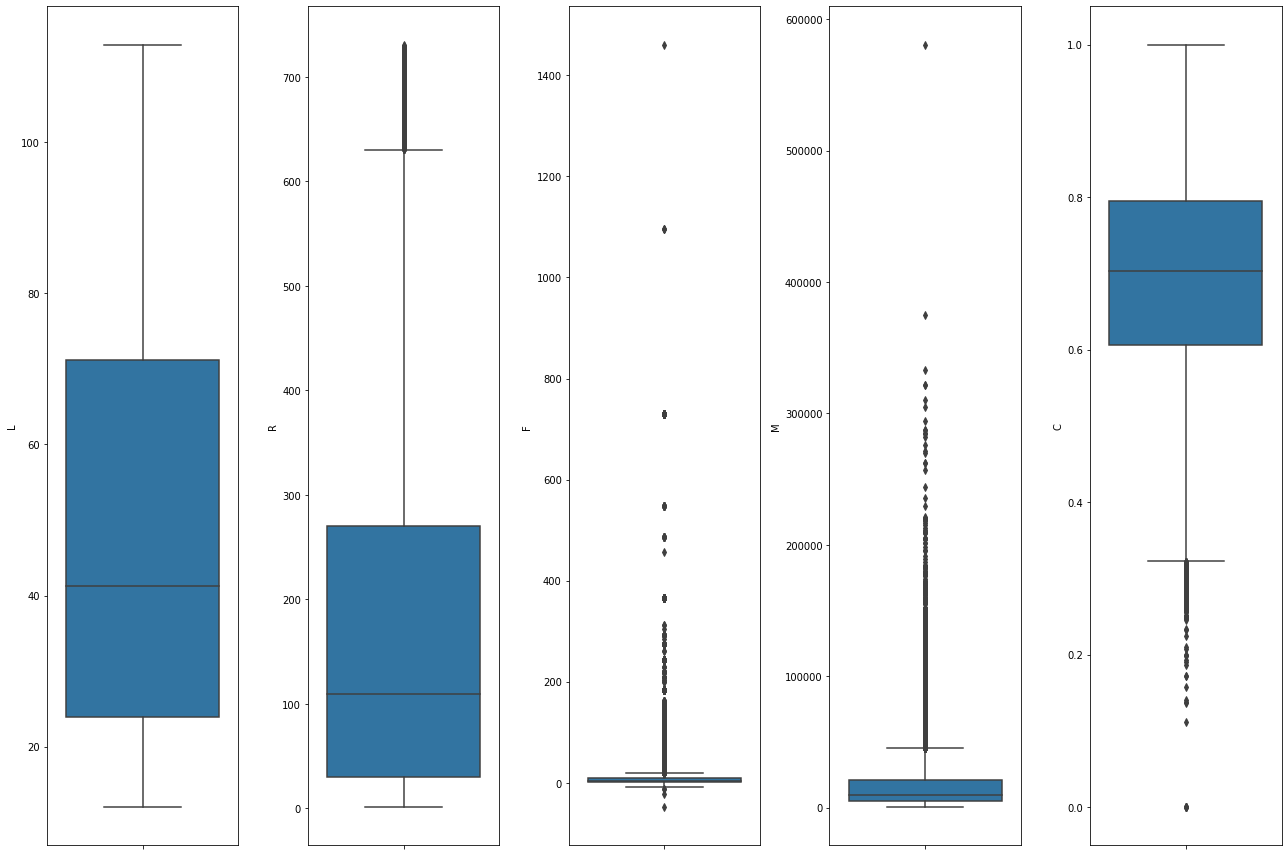

In [74]:
for i, col in enumerate(['L', 'R', 'F', 'M', 'C']):
    plt.subplot(1, 5, i+1)            
    sns.boxplot(
        y=data_for_clustering[col], 
    )
    plt.tight_layout()

plt.show() 

In [75]:
data_with_outliers = data_for_clustering.copy()

fil_ent = np.array([True] * len(data_for_clustering))
for col in data_for_clustering.columns.tolist():
    q1 = data_for_clustering[col].quantile(0.25)  
    q3 = data_for_clustering[col].quantile(0.75)
    iqr = q3 - q1
    low_limit = q1 - (iqr * 1.5)
    high_limit = q3 + (iqr * 1.5)
    
    # drop outliers
    fil_ent = ((data_for_clustering[col] >= low_limit) & (data_for_clustering[col] <= high_limit)) & fil_ent
    
data_without_outliers = data_for_clustering[fil_ent].reset_index(drop=True)

In [76]:
print(f"Data with outliers: {data_with_outliers.shape[0]} rows")
print(f"Data without outliers: {data_without_outliers.shape[0]} rows")

Data with outliers: 60041 rows
Data without outliers: 48882 rows


In [77]:
data_without_outliers.sample(5)

,L,R,F,M,C
43691,31.770673,52,2.395033,3312,0.600000
33553,16.033183,123,8.049421,8156,0.502187
23098,31.737818,94,9.096078,12302,0.582985
29135,23.096984,442,5.345012,5929,0.882248
34923,12.386291,81,9.131063,6181,0.611047


### Feature Scaling

In [79]:
data_without_outliers = data_without_outliers[~data_without_outliers.isin([np.nan, np.inf, -np.inf]).any(1)]

In [80]:
from sklearn.preprocessing import StandardScaler
X = data_without_outliers.values
X_scaled = StandardScaler().fit_transform(X)
df_X_scaled = pd.DataFrame(data=X_scaled, columns=data_without_outliers.columns)
df_X_scaled.head()

,L,R,F,M,C
0,-0.640830,-0.433412,2.364728,2.946823,2.186105
1,0.463661,-0.776593,0.441358,3.151836,1.816499
2,2.258308,-0.242755,-0.290352,3.006257,2.044803
3,0.669624,1.225298,-0.609352,3.039276,1.937261
4,0.002352,-0.871921,1.326259,3.069732,1.869654


## Soal 3

Lakukan clustering K-means! Temukan jumlah cluster yang
menurut teman-teman optimal dan evaluasi cluster yang
dihasilkan dengan visualisasi dan silhouette score

## Select the number of clusters

In [81]:
from sklearn.cluster import KMeans

inertia = []
for i in range(1, 11):
    k_means = KMeans(n_clusters=i, random_state=42)
    k_means.fit(X_scaled)
    inertia.append(k_means.inertia_)

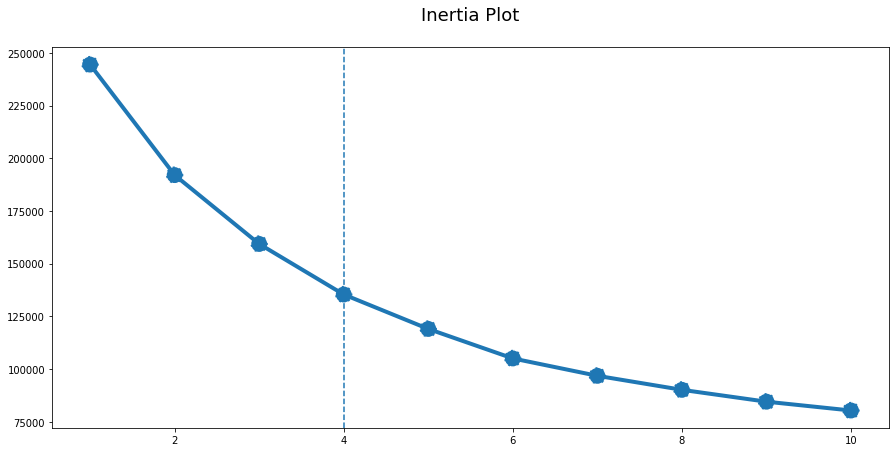

In [82]:
plt.figure(figsize=(15, 7))
sns.lineplot(x=range(1, 11), y=inertia, linewidth = 4)
sns.scatterplot(x=range(1, 11), y=inertia, s=300, linestyle='--')
plt.title("Inertia Plot\n", fontsize=18)
plt.axvline(4, linestyle='--')

Berdasarkan grafik di atas, dengan menggunakan elbow method maka jumlah cluster yang dipilih yaitu 4.

In [83]:
k_means = KMeans(n_clusters=4, random_state=0)
k_means.fit(X_scaled)

KMeans(n_clusters=4, random_state=0)

In [84]:
# add the cluster number to the data
data_without_outliers['cluster'] = k_means.labels_
data_without_outliers.sample(5)

,L,R,F,M,C,cluster
28185,80.428756,35,0.907435,8627,0.638320,0
40789,82.794308,221,0.338815,3111,0.819855,0
9303,35.516130,23,5.350232,17106,0.881437,3
38157,47.475308,302,1.820750,4152,0.742577,1
8565,24.772583,96,5.533977,21587,0.731138,3


In [85]:
data_without_outliers['cluster'].unique()

array([3, 0, 1, 2], dtype=int32)

### Clusters Visualization

In [86]:
# reduce the dimension to visualize each cluster
from sklearn.decomposition import PCA 

pca = PCA(n_components=2, random_state=0)
pca.fit(X_scaled)
pcs = pca.transform(X_scaled)

data_for_visualization = pd.DataFrame(
    pcs,
    columns=['pc_1', 'pc_2']
)

# append to data without outliers
for col in ['pc_1', 'pc_2']:
    data_without_outliers[col] = data_for_visualization[col].copy()
    
data_without_outliers.sample(3)

,L,R,F,M,C,cluster,pc_1,pc_2
48112,61.307214,387,0.701041,977,1.000000,1,-1.942179,0.757024
23984,19.055833,117,5.498274,11731,0.584590,2,0.690070,0.703543
39605,31.507834,93,1.576586,3687,0.753686,2,-0.490918,0.428652


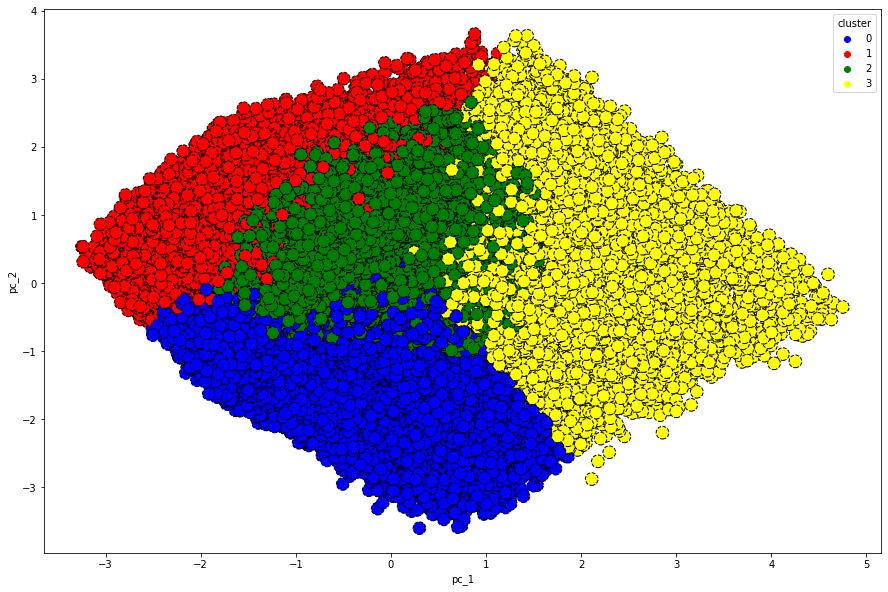

In [87]:
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(
    x="pc_1", y="pc_2",
    hue="cluster",
    edgecolor='black',
    linestyle='--',
    data=data_without_outliers,
    palette=['blue','red','green','yellow'],
    s=160,
    ax=ax
)
plt.show()

# Soal 4

Interpretasi cluster yang dihasilkan secara bisnis dan berikan
rekomendasi yang sesuai dengan cluster yang dihasilkan

Berdasarkan hasil analisis dan modeling, diperoleh beberapa poin penting sebagai berikut.

1. Feature-feature yang berpengaruh dalam segmentasi pelanggan di bidang airline ada lima yaitu 
    * jarak penerbangan (km)
    * jarak waktu penerbangan terakhir ke pesanan penerbangan terkini (bulan)
    * rata-rata diskon (persentase)
    * durasi pelanggan menjadi member (month)
    * rata-rata jumlah penerbangan per tahun


2. Berdasarkan hasil modeling, karakteristik setiap cluster dapat dilihat berdasarkan tabel dibawah ini. Pada kolom C (rata-rata diskon) terlihat bahwa diskon yang diperoleh pelanggan tidak terlalu mempengaruhi segmentasi pelanggan karena nilai mean dan median tiap cluster tidak berbeda jauh.

In [88]:
display(data_without_outliers.groupby('cluster').agg(['mean','median']).round(2))

L              R             F                M              C  \
          mean median    mean median   mean median      mean   median  mean   
cluster                                                                       
0        80.70  80.43   86.41   66.0   2.28   1.90  16742.50  14812.0  0.71   
1        52.04  48.03  423.74  418.0   2.90   1.70   5888.18   4660.0  0.73   
2        32.64  31.02  113.20   98.0   3.64   3.26   8193.56   7187.5  0.66   
3        29.31  24.94  104.02   61.0  10.59   9.99  22041.94  21288.0  0.71   

                pc_1         pc_2         
        median  mean median  mean median  
cluster                                   
0         0.71 -0.49  -0.57 -1.30  -1.19  
1         0.74 -1.27  -1.34  1.07   1.04  
2         0.66  0.01   0.01  0.41   0.39  
3         0.71  1.88   1.74  0.23   0.19

Berikut ini penjelasan setiap cluster.
* **Cluster 0** merupakan customer yang telah menjadi member cukup lama dengan rata-rata 81 bulan dan jumlah penerbengan per tahun cenderung rendah dengan rata-rata 2 kali per tahun tetapi rata-rata jarak tempuh yang cenderung tinggi sekitar 16 ribu km.

* **Cluster 1** merupakan customer baru dengan durasi rata-rata menjadi member hanya 30 bulan. Namun, customer ini sering melakukan penerbangan dengan rata-rata 11 penerbangan per tahun dan rata-rata jarak tempuh yang jauh sekitar 22 ribu km.

* **Cluster 2** merupakan customer dengan durasi member, frekuensi terbang, dan jarak terbang yang sedang namun memiliki jarak waktu penerbangan akhir ke pesanan penerbangan terkini rendah.

* **Cluster 3** merupakan customer dengan durasi member, frekuensi terbang, dan jarak terbang yang sedang namun memiliki jarak waktu penerbangan akhir ke pesanan penerbangan terkini paling tinggi.

**Rekomendasi Bisnis**

1. Membuat program membership yang berjenjang berdasarkan jumlah penerbangan per tahun dan jarak tempuh penerbangan. Apabila jenjang semakin tinggi maka perusahaan airline tersebut akan memberikan benefit yang semakin tinggi juga misalnya seperti mendapat voucher diskon untuk membeli makanan di pesawat.